In [2]:
import pandas as pd

# Get appris data 
df = pd.read_csv("/home/mouren/Data/revisions/splicing_exons/3_appris/appris_score_hg38_ensembl_114.txt", sep="\t", header=0)
filtered_df = df[df["APPRIS Annotation"].notna()]
hg_appris = dict(zip(filtered_df["Transcript ID"], filtered_df["APPRIS Annotation"]))

df = pd.read_csv("/home/mouren/Data/revisions/splicing_exons/3_appris/appris_score_mm39_ensembl_114.txt", sep="\t", header=0)
filtered_df = df[df["APPRIS Annotation"].notna()]
mm_appris = dict(zip(filtered_df["Transcript ID"], filtered_df["APPRIS Annotation"]))

df = pd.read_csv("/home/mouren/Data/revisions/splicing_exons/3_appris/appris_score_dm6_ensembl_104.txt", sep="\t", header=0)
filtered_df = df[df["APPRIS Annotation"].notna()]
dm_appris = dict(zip(filtered_df["Transcript ID"], filtered_df["APPRIS Annotation"]))

/tmp/ipykernel_1268051/3199248799.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/home/mouren/Data/revisions/splicing_exons/3_appris/appris_score_hg38_ensembl_114.txt", sep="\t", header=0)
/tmp/ipykernel_1268051/3199248799.py:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/home/mouren/Data/revisions/splicing_exons/3_appris/appris_score_mm39_ensembl_114.txt", sep="\t", header=0)


In [3]:
# Get EE transcripts lists
hg_ee = {}
with open("/home/mouren/Data/revisions/splicing_exons/3_appris/hg38_EE.bed") as file:
    for line in file:            
        hg_ee[line.strip().split()[3]] = [((line.strip().split()[3]).split("_")[0]).split(".")[0]]

mm_ee = {}
with open("/home/mouren/Data/revisions/splicing_exons/3_appris/mm39_EE.bed") as file:
    for line in file:            
        mm_ee[line.strip().split()[3]] = [((line.strip().split()[3]).split("_")[0]).split(".")[0]]

dm_ee = {}
with open("/home/mouren/Data/revisions/splicing_exons/3_appris/dm6_EE.bed") as file:
    for line in file:            
        dm_ee[line.strip().split()[3]] = [(line.strip().split()[3]).split("_")[0]]

with open("/home/mouren/Data/revisions/splicing_exons/3_appris/coding_exons_50pb_merge_Hsap_tls1.tsv") as file:
    for line in file:    
        if line.strip().split()[3] in hg_ee:
            if line.strip().split()[7] != "None":
                for i in (line.strip().split()[7]).split(";"):
                    if (i.split("_")[0]).split(".")[0] not in hg_ee:
                        hg_ee[line.strip().split()[3]].append((i.split("_")[0]).split(".")[0])
            if line.strip().split()[8] != "None":
                for i in (line.strip().split()[8]).split(";"):
                    if (i.split("_")[0]).split(".")[0] not in hg_ee:
                        hg_ee[line.strip().split()[3]].append((i.split("_")[0]).split(".")[0])

with open("/home/mouren/Data/revisions/splicing_exons/3_appris/coding_exons_50pb_merge_mm39.tsv") as file:
    for line in file:    
        if line.strip().split()[3] in mm_ee:
            if line.strip().split()[7] != "None":
                for i in (line.strip().split()[7]).split(";"):
                    if i.split("_")[0] not in mm_ee:
                        mm_ee[line.strip().split()[3]].append(i.split("_")[0])
            if line.strip().split()[8] != "None":
                for i in (line.strip().split()[8]).split(";"):
                    if i.split("_")[0] not in mm_ee:
                        mm_ee[line.strip().split()[3]].append(i.split("_")[0])

with open("/home/mouren/Data/revisions/splicing_exons/3_appris/coding_exons_50pb_merge_dm6.tsv") as file:
    for line in file:    
        if line.strip().split()[3] in dm_ee:
            if line.strip().split()[7] != "None":
                for i in (line.strip().split()[7]).split(";"):
                    if (i.split("_")[0]).split(".")[0] not in dm_ee:
                        dm_ee[line.strip().split()[3]].append((i.split("_")[0]).split(".")[0])
            if line.strip().split()[8] != "None":
                for i in (line.strip().split()[8]).split(";"):
                    if (i.split("_")[0]).split(".")[0] not in dm_ee:
                        dm_ee[line.strip().split()[3]].append((i.split("_")[0]).split(".")[0])

In [4]:
# Get EE transcripts lists
hg_neg = {}
with open("/home/mouren/Data/revisions/splicing_exons/3_appris/control_neg_NoTF_NoTSS_TES_prom.tsv") as file:
    for line in file:            
        hg_neg[line.strip().split()[3]] = [((line.strip().split()[3]).split("_")[0]).split(".")[0]]

mm_neg = {}
with open("/home/mouren/Data/revisions/splicing_exons/3_appris/mm39_control_neg_NoTF_NoTSS_TES_prom.tsv") as file:
    for line in file:            
        mm_neg[line.strip().split()[3]] = [((line.strip().split()[3]).split("_")[0]).split(".")[0]]

dm_neg = {}
with open("/home/mouren/Data/revisions/splicing_exons/3_appris/dm6_control_neg_NoTF_NoTSS_TES.tsv") as file:
    for line in file:            
        dm_neg[line.strip().split()[3]] = [(line.strip().split()[3]).split("_")[0]]

with open("/home/mouren/Data/revisions/splicing_exons/3_appris/coding_exons_50pb_merge_Hsap_tls1.tsv") as file:
    for line in file:    
        if line.strip().split()[3] in hg_neg:
            if line.strip().split()[7] != "None":
                for i in (line.strip().split()[7]).split(";"):
                    if (i.split("_")[0]).split(".")[0] not in hg_neg:
                        hg_neg[line.strip().split()[3]].append((i.split("_")[0]).split(".")[0])
            if line.strip().split()[8] != "None":
                for i in (line.strip().split()[8]).split(";"):
                    if (i.split("_")[0]).split(".")[0] not in hg_neg:
                        hg_neg[line.strip().split()[3]].append((i.split("_")[0]).split(".")[0])

with open("/home/mouren/Data/revisions/splicing_exons/3_appris/coding_exons_50pb_merge_mm39.tsv") as file:
    for line in file:    
        if line.strip().split()[3] in mm_neg:
            if line.strip().split()[7] != "None":
                for i in (line.strip().split()[7]).split(";"):
                    if i.split("_")[0] not in mm_neg:
                        mm_neg[line.strip().split()[3]].append(i.split("_")[0])
            if line.strip().split()[8] != "None":
                for i in (line.strip().split()[8]).split(";"):
                    if i.split("_")[0] not in mm_neg:
                        mm_neg[line.strip().split()[3]].append(i.split("_")[0])

with open("/home/mouren/Data/revisions/splicing_exons/3_appris/coding_exons_50pb_merge_dm6.tsv") as file:
    for line in file:    
        if line.strip().split()[3] in dm_neg:
            if line.strip().split()[7] != "None":
                for i in (line.strip().split()[7]).split(";"):
                    if (i.split("_")[0]).split(".")[0] not in dm_neg:
                        dm_neg[line.strip().split()[3]].append((i.split("_")[0]).split(".")[0])
            if line.strip().split()[8] != "None":
                for i in (line.strip().split()[8]).split(";"):
                    if (i.split("_")[0]).split(".")[0] not in dm_neg:
                        dm_neg[line.strip().split()[3]].append((i.split("_")[0]).split(".")[0])

In [5]:
# Prepare notation
def get_appris_annotation(score):
    if score == 0:
        return "PRINCIPAL:M"
    elif score == 1:
        return "PRINCIPAL:1"
    elif score == 2:
        return "PRINCIPAL:2"
    elif score == 3:
        return "PRINCIPAL:3"
    elif score == 4:
        return "PRINCIPAL:4"
    elif score == 5:
        return "PRINCIPAL:5"
    elif score == 6:
        return "ALTERNATIVE:M"
    elif score == 7:
        return "ALTERNATIVE:1"
    elif score == 8:
        return "ALTERNATIVE:2"
    elif score == 9:
        return "MINOR"
    else:
        return None

priority_order = {"PRINCIPAL:M":0,"PRINCIPAL:1":1,"PRINCIPAL:2":2,"PRINCIPAL:3":3,"PRINCIPAL:4":4,"PRINCIPAL:5":5,"ALTERNATIVE:M":6,"ALTERNATIVE:1":7,"ALTERNATIVE:2":8,"MINOR":9}

In [6]:
### Get best appris annotation possible for ee and neg 
# HG
res_ee_hg = {"PRINCIPAL:M":0,"PRINCIPAL:1":0,"PRINCIPAL:2":0,"PRINCIPAL:3":0,"PRINCIPAL:4":0,"PRINCIPAL:5":0,"ALTERNATIVE:M":0,"ALTERNATIVE:1":0,"ALTERNATIVE:2":0,"MINOR":0,"UNKNOWN":0}
for exon,val in hg_ee.items():
    best = 100
    for transcript in val:
        try:
            if priority_order[hg_appris[transcript]] < best:
                best = priority_order[hg_appris[transcript]]
        except KeyError:
            continue
    try:
        res_ee_hg[get_appris_annotation(best)] += 1 
    except KeyError:
        res_ee_hg["UNKNOWN"] += 1 

res_neg_hg = {"PRINCIPAL:M":0,"PRINCIPAL:1":0,"PRINCIPAL:2":0,"PRINCIPAL:3":0,"PRINCIPAL:4":0,"PRINCIPAL:5":0,"ALTERNATIVE:M":0,"ALTERNATIVE:1":0,"ALTERNATIVE:2":0,"MINOR":0,"UNKNOWN":0}
for exon,val in hg_neg.items():
    best = 100
    for transcript in val:
        try:
            if priority_order[hg_appris[transcript]] < best:
                best = priority_order[hg_appris[transcript]]
        except KeyError:
            continue
    try:
        res_neg_hg[get_appris_annotation(best)] += 1 
    except KeyError:
        res_neg_hg["UNKNOWN"] += 1 

# MM
res_ee_mm = {"PRINCIPAL:M":0,"PRINCIPAL:1":0,"PRINCIPAL:2":0,"PRINCIPAL:3":0,"PRINCIPAL:4":0,"PRINCIPAL:5":0,"ALTERNATIVE:M":0,"ALTERNATIVE:1":0,"ALTERNATIVE:2":0,"MINOR":0,"UNKNOWN":0}
for exon,val in mm_ee.items():
    best = 100
    for transcript in val:
        try:
            if priority_order[mm_appris[transcript]] < best:
                best = priority_order[mm_appris[transcript]]
        except KeyError:
            continue
    try:
        res_ee_mm[get_appris_annotation(best)] += 1 
    except KeyError:
        res_ee_mm["UNKNOWN"] += 1 

res_neg_mm = {"PRINCIPAL:M":0,"PRINCIPAL:1":0,"PRINCIPAL:2":0,"PRINCIPAL:3":0,"PRINCIPAL:4":0,"PRINCIPAL:5":0,"ALTERNATIVE:M":0,"ALTERNATIVE:1":0,"ALTERNATIVE:2":0,"MINOR":0,"UNKNOWN":0}
for exon,val in mm_neg.items():
    best = 100
    for transcript in val:
        try:
            if priority_order[mm_appris[transcript]] < best:
                best = priority_order[mm_appris[transcript]]
        except KeyError:
            continue
    try:
        res_neg_mm[get_appris_annotation(best)] += 1 
    except KeyError:
        res_neg_mm["UNKNOWN"] += 1 

# DM
res_ee_dm = {"PRINCIPAL:M":0,"PRINCIPAL:1":0,"PRINCIPAL:2":0,"PRINCIPAL:3":0,"PRINCIPAL:4":0,"PRINCIPAL:5":0,"ALTERNATIVE:M":0,"ALTERNATIVE:1":0,"ALTERNATIVE:2":0,"MINOR":0,"UNKNOWN":0}
for exon,val in dm_ee.items():
    best = 100
    for transcript in val:
        try:
            if priority_order[dm_appris[transcript]] < best:
                best = priority_order[dm_appris[transcript]]
        except KeyError:
            continue
    try:
        res_ee_dm[get_appris_annotation(best)] += 1 
    except KeyError:
        res_ee_dm["UNKNOWN"] += 1 

res_neg_dm = {"PRINCIPAL:M":0,"PRINCIPAL:1":0,"PRINCIPAL:2":0,"PRINCIPAL:3":0,"PRINCIPAL:4":0,"PRINCIPAL:5":0,"ALTERNATIVE:M":0,"ALTERNATIVE:1":0,"ALTERNATIVE:2":0,"MINOR":0,"UNKNOWN":0}
for exon,val in dm_neg.items():
    best = 100
    for transcript in val:
        try:
            if priority_order[dm_appris[transcript]] < best:
                best = priority_order[dm_appris[transcript]]
        except KeyError:
            continue
    try:
        res_neg_dm[get_appris_annotation(best)] += 1 
    except KeyError:
        res_neg_dm["UNKNOWN"] += 1 

In [7]:
### Compute percentage 
res_ee_hg_perc = {}
res_neg_hg_perc = {}
res_ee_mm_perc = {}
res_neg_mm_perc = {}
res_ee_dm_perc = {}
res_neg_dm_perc = {}

for key,val in res_ee_hg.items():
    res_ee_hg_perc[key] = (val*100)/13481
for key,val in res_neg_hg.items():
    res_neg_hg_perc[key] = (val*100)/13253

for key,val in res_ee_mm.items():
    res_ee_mm_perc[key] = (val*100)/12244
for key,val in res_neg_mm.items():
    res_neg_mm_perc[key] = (val*100)/18457

for key,val in res_ee_dm.items():
    res_ee_dm_perc[key] = (val*100)/13688
for key,val in res_neg_dm.items():
    res_neg_dm_perc[key] = (val*100)/903

/tmp/ipykernel_1268051/3450248738.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', len(categories))


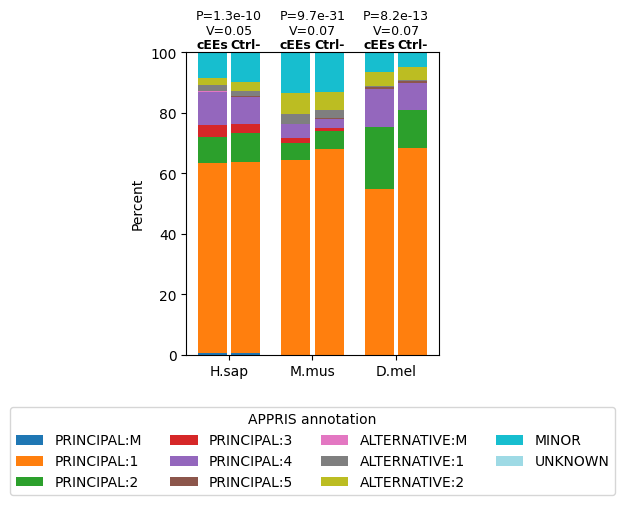

In [19]:
### Plot
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

# Define ordered keys for consistent stacking
categories = list(res_ee_hg_perc.keys())

# Prepare the data
pairs = [
    ("H.sap", res_ee_hg_perc, res_neg_hg_perc),
    ("M.mus", res_ee_mm_perc, res_neg_mm_perc),
    ("D.mel", res_ee_dm_perc, res_neg_dm_perc),
]

x = np.arange(len(pairs))  # x positions for groups
width = 0.35  # total bar width
gap = 0.05    # extra spacing between bars in a pair

# Assign unique color per category
cmap = cm.get_cmap('tab20', len(categories))
colors = {cat: cmap(i) for i, cat in enumerate(categories)}

# Plotting
fig, ax = plt.subplots(figsize=(5, 5))

bottoms_ee = np.zeros(len(pairs))
bottoms_neg = np.zeros(len(pairs))

# Plot each category with consistent color
for cat in categories:
    values_ee = [ee[cat] for _, ee, _ in pairs]
    values_neg = [neg[cat] for _, _, neg in pairs]

    ax.bar(x - width/2 - gap/2, values_ee, width=width, label=cat if cat not in ax.get_legend_handles_labels()[1] else "", bottom=bottoms_ee, color=colors[cat])
    ax.bar(x + width/2 + gap/2, values_neg, width=width, bottom=bottoms_neg, color=colors[cat])

    bottoms_ee += values_ee
    bottoms_neg += values_neg

# Add EE / NEG labels above the stacks
for i, (label, _, _) in enumerate(pairs):
    ee_top = bottoms_ee[i]
    neg_top = bottoms_neg[i]
    
    ax.text(x[i] - width/2 - gap/2, ee_top + 0.5, 'cEEs', ha='center', va='bottom', fontsize=9, fontweight="semibold")
    ax.text(x[i] + width/2 + gap/2, neg_top + 0.5, 'Ctrl-', ha='center', va='bottom', fontsize=9, fontweight="semibold")

# Formatting
ax.set_ylabel('Percent')
ax.set_xticks(x)
ax.set_xticklabels([label for label, _, _ in pairs])
ax.legend(title='APPRIS annotation', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.tight_layout()

### Stats
from scipy.stats import chi2_contingency
import numpy as np

def collapse_appris_counts(count_dict):
    collapsed = {'PRINCIPAL': 0, 'PRINCIPAL_B': 0, 'ALTERNATIVE': 0}
    for key, val in count_dict.items():
        if key in ['PRINCIPAL:M', 'PRINCIPAL:1', 'PRINCIPAL:2']:
            collapsed['PRINCIPAL'] += val
        elif key in ['PRINCIPAL:3', 'PRINCIPAL:4', 'PRINCIPAL:5']:
            collapsed['PRINCIPAL_B'] += val
        else:
            collapsed['ALTERNATIVE'] += val
    return collapsed

def cramers_v(confusion_matrix):
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

raw_pairs = [
    ("H.sap", res_ee_hg, res_neg_hg),
    ("M.mus", res_ee_mm, res_neg_mm),
    ("D.mel", res_ee_dm, res_neg_dm),
]

"""for i, (label, ee_raw, neg_raw) in enumerate(raw_pairs):
    # Collapse categories
    ee = collapse_appris_counts(ee_raw)
    neg = collapse_appris_counts(neg_raw)

    cats = ['PRINCIPAL', 'PRINCIPAL_B', 'ALTERNATIVE']
    ee_counts = [ee[cat] for cat in cats]
    neg_counts = [neg[cat] for cat in cats]

    contingency = np.array([ee_counts, neg_counts])
    chi2, pval, dof, expected = chi2_contingency(contingency)
    v = cramers_v(contingency)

    # Annotate both p and V
    ax.text(x[i], 105, f"p = {pval:.1e}\nV = {v:.2f}", ha='center', va='bottom', fontsize=9, fontweight='bold')"""

for i, (label, ee_counts_dict, neg_counts_dict) in enumerate(raw_pairs):
    # Filter categories with non-zero total counts
    filtered_categories = [
        cat for cat in categories
        if ee_counts_dict[cat] + neg_counts_dict[cat] > 0
    ]

    ee_counts = [ee_counts_dict[cat] for cat in filtered_categories]
    neg_counts = [neg_counts_dict[cat] for cat in filtered_categories]

    contingency_table = np.array([ee_counts, neg_counts])
    
    # Perform Chi-squared test
    chi2, pval, dof, expected = chi2_contingency(contingency_table)
    v = cramers_v(contingency_table)

    # Annotate p-value
    ax.text(x[i], 105, f"P={pval:.1e}\nV={v:.2f}", ha='center', va='bottom', fontsize=9)

plt.savefig("/home/mouren/Images/tls1/revisions/rev_1_pt3_appris.pdf", format="pdf", bbox_inches="tight", dpi=450)
plt.savefig("/home/mouren/Images/tls1/revisions/rev_1_pt3_appris.png", format="png", bbox_inches="tight", dpi=450)
plt.show()